Regression Week 4: Ridge Regression Assignment 1
In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

Use a pre-built implementation of regression to run polynomial regression
Use matplotlib to visualize polynomial regressions
Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
Use matplotlib to visualize polynomial regressions under L2 regularization
Choose best L2 penalty using cross-validation.
Assess the final fit using test data.
We will continue to use the House data from previous assignments. (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [2]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 68kB/s 
     |████████████████████████████████| 86.3MB 72kB/s 
     |████████████████████████████████| 3.4MB 35.5MB/s 
     |████████████████████████████████| 327kB 38.4MB/s 
     |████████████████████████████████| 450kB 42.4MB/s 
     |████████████████████████████████| 3.8MB 34.2MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=3df7a806fc65b2a5a4646a6668b53eef4eb3b43b6778cecd068c3a4d5a12ecb7
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b6773928748ecff2e00ceaf6fa4e1082ff3dc2688ecacfa1d93760810cb3857a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Fo

In [0]:
import turicreate
from turicreate import SFrame
import numpy as np
import math

In [0]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [6]:
sales = turicreate.SFrame('/content/drive/My Drive/Colab Notebooks/Machine Learning/Course 2 Machine Learning Regression/Week2/Assignment1/home_data.sframe')
sales = sales.sort(['sqft_living','price'])
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875.0,1.0,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801.0,1.0,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000.0,1.0,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444.0,1.0,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900.0,1.0,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000.0,1.0,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636.0,1.0,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298.0,1.0,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720.0,1.0,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050.0,1.0,0


3. Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:
    
       l2_small_penalty = 1.5e-5


In [0]:
l2_small_penalty = 1.5e-5

**Note:** When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights. Add "alpha=l2_small_penalty" and "normalize=True" to the parameter list of linear_model.Ridge:

      from sklearn import linear_model
      import numpy as np

      poly15_data = polynomial_sframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
      model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
      model.fit(poly15_data, sales['price'])


In [0]:
from sklearn import linear_model
 
poly15_data = polynomial_sframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`

poly15_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price']

model15 = turicreate.linear_regression.create(poly15_data, 
                                             target = 'price',
                                             features = poly15_features,
                                             l2_penalty = l2_small_penalty,
                                             validation_set = None,
                                             verbose=False)

In [75]:
model15.coefficients.print_rows(num_rows = 16)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    156896.99885983183   |   417122.0065470105    |
|   power_1   |  None |    137.41232628138232   |   1916.0762344555162   |
|   power_2   |  None |   0.09434563246344273   |   3.665300328218177    |
|   power_3   |  None | -0.00010600651108376027 | 0.0038535958837442826  |
|   power_4   |  None |  4.5049537061284684e-08 | 2.477988193277112e-06  |
|   power_5   |  None |  -6.81277397623795e-12  | 1.0241627732196597e-09 |
|   power_6   |  None |  1.4634053940705682e-16 | 2.7764872909301084e-13 |
|   power_7   |  None |  3.8054538042389284e-20 | 5.000306084508913e-17  |
|   power_8   |  None | -2.1542930879316397e-25 | 6.592225641745434e-21  |
|   power_9   |  None |  -1.847953501322728e-28 | 8.424259529940343e-25  |
|   power_10  |  None |  

4. **Quiz Question:** What’s the learned value for the coefficient of feature power_1?

#**Observe Overfitting**

5. Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

*   first split sales into 2 subsets with .random_split(.5) use seed = 0!
*   next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
*   you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4

In [0]:
set1_1, set2_2 = sales.random_split(.5, seed=0)
set1, set2 = set1_1.random_split(.5, seed=0)
set3, set4 = set2_2.random_split(.5, seed=0)

In [0]:
l2_poly_penalty=1e-9

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |   -160126.25842047253   |   833320.8779053952    |
|   power_1   |  None |    798.6999793442039    |   3595.7916573695425   |
|   power_2   |  None |   0.022530792128448923  |   6.420905268875983    |
|   power_3   |  None |  -0.000834993936569426  |  0.006274754003354131  |
|   power_4   |  None |  7.433958635307228e-07  | 3.7514169376881496e-06 |
|   power_5   |  None |  -2.927301447999671e-10 | 1.462338405232716e-09  |
|   power_6   |  None |  5.827116669867331e-14  | 3.933935084383741e-13  |
|   power_7   |  None |  -4.931259426267978e-18 | 7.824048006039244e-17  |
|   power_8   |  None |  -8.110446776561954e-23 | 1.1871198981985578e-20 |
|   power_9   |  None |  3.028853539111494e-26  | 1.2298744306907418e-24 |
|   power_10  |  None |  

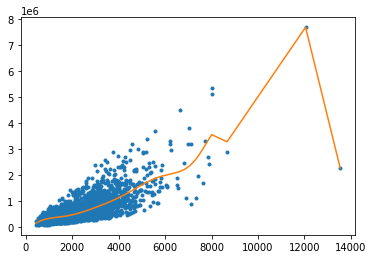

In [27]:
set1_data = polynomial_sframe(set1['sqft_living'], 15)
set1_features = set1_data.column_names() # get the name of the features
set1_data['price'] = set1['price']
set1_model = turicreate.linear_regression.create(set1_data, 
                                             target = 'price',
                                             features = set1_features,
                                             l2_penalty = l2_poly_penalty,
                                             validation_set = None,
                                             verbose = False)
set1_model.coefficients.print_rows(num_rows=16)
plt.plot(set1_data['power_1'], set1_data['price'], '.', set1_data['power_1'], set1_model.predict(set1_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    1176600.9010029698   |   1248028.8701703902   |
|   power_1   |  None |     -4232.7154324152    |   6443.1542973530995   |
|   power_2   |  None |    7.361274934633805    |   13.669550924962937   |
|   power_3   |  None |  -0.006194972938898392  |  0.015450315165577535  |
|   power_4   |  None |   2.77621277554324e-06  | 9.776642978968516e-06  |
|   power_5   |  None |  -6.019633172876006e-10 | 2.3990687896033535e-09 |
|   power_6   |  None |  1.8590653448152327e-14 |          nan           |
|   power_7   |  None |  1.6760580668322118e-17 |          nan           |
|   power_8   |  None |  -2.263662696798525e-21 |          nan           |
|   power_9   |  None | -1.3613485970670855e-25 | 1.741023140325115e-24  |
|   power_10  |  None |  

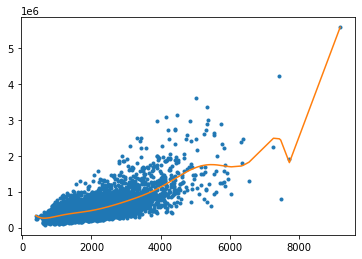

In [28]:
set2_data = polynomial_sframe(set2['sqft_living'], 15)
set2_features = set2_data.column_names() # get the name of the features
set2_data['price'] = set2['price']
set2_model = turicreate.linear_regression.create(set2_data, 
                                             target = 'price',
                                             features = set2_features,
                                             l2_penalty = l2_poly_penalty,
                                             validation_set = None,
                                             verbose = False)
set2_model.coefficients.print_rows(num_rows=16)
plt.plot(set2_data['power_1'], set2_data['price'], '.', set2_data['power_1'], set2_model.predict(set2_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    -592338.0590682508   |   1148031.7615517778   |
|   power_1   |  None |    2946.3792011012224   |   5263.431110276429    |
|   power_2   |  None |   -3.8146358024887475   |    9.79025252786058    |
|   power_3   |  None |   0.002378339458346896  |  0.009354706024803233  |
|   power_4   |  None |  -5.675560436967293e-07 | 4.109084136572406e-06  |
|   power_5   |  None |  -8.855156581618927e-11 |          nan           |
|   power_6   |  None |  8.087488313293312e-14  |          nan           |
|   power_7   |  None | -1.6297119633431805e-17 |          nan           |
|   power_8   |  None |  7.123450169939974e-22  |          nan           |
|   power_9   |  None |  1.4540643742614135e-25 |          nan           |
|   power_10  |  None |  

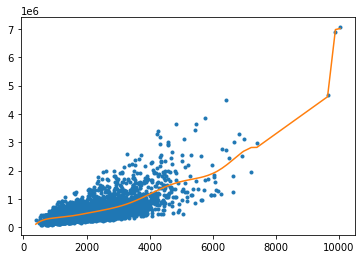

In [29]:
set3_data = polynomial_sframe(set3['sqft_living'], 15)
set3_features = set3_data.column_names() # get the name of the features
set3_data['price'] = set3['price']
set3_model = turicreate.linear_regression.create(set3_data, 
                                             target = 'price',
                                             features = set3_features,
                                             l2_penalty = l2_poly_penalty,
                                             validation_set = None,
                                             verbose = False)
set3_model.coefficients.print_rows(num_rows=16)
plt.plot(set3_data['power_1'], set3_data['price'], '.', set3_data['power_1'], set3_model.predict(set3_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    385268.39332467545   |   1523845.7723643421   |
|   power_1   |  None |    -775.050633886195    |   9797.791050032085    |
|   power_2   |  None |    1.2295276172771379   |   26.11514856058889    |
|   power_3   |  None | -0.00026563251856433966 |  0.038216046299686876  |
|   power_4   |  None |  -7.20826257151434e-07  |  3.42260833330979e-05  |
|   power_5   |  None |  6.903829152850908e-10  | 1.9633171008624522e-08 |
|   power_6   |  None |  -2.627732912762175e-13 | 7.196585500250679e-12  |
|   power_7   |  None |  4.286825611631372e-17  | 1.5141478374315537e-15 |
|   power_8   |  None |  -2.265575486298522e-22 |          nan           |
|   power_9   |  None | -7.1918611736820245e-25 |          nan           |
|   power_10  |  None |  

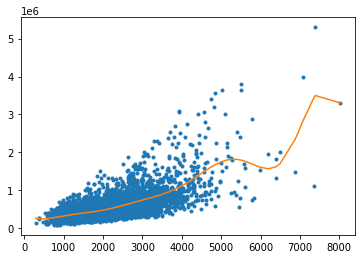

In [30]:
set4_data = polynomial_sframe(set4['sqft_living'], 15)
set4_features = set4_data.column_names() # get the name of the features
set4_data['price'] = set4['price']
set4_model = turicreate.linear_regression.create(set4_data, 
                                             target = 'price',
                                             features = set4_features,
                                             l2_penalty = l2_poly_penalty,
                                             validation_set = None,
                                             verbose = False)
set4_model.coefficients.print_rows(num_rows=16)
plt.plot(set4_data['power_1'], set4_data['price'], '.', set4_data['power_1'], set4_model.predict(set4_data), '-')

8. **Quiz Question:** For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? 

# **Ridge regression comes to rescue**

9. Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

10. Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. Make sure to add "alpha=l2_large_penalty" and "normalize=True" to the parameter list, where the value of l2_large_penalty is given by

In [0]:
l2_large_penalty=1.23e2

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    216957.08928561368   |   841986.5108568087    |
|   power_1   |  None |    74.22291916459729    |   3633.1839890615565   |
|   power_2   |  None |   0.027254256714061162  |   6.487675716792436    |
|   power_3   |  None |  1.7859653301341246e-06 |  0.006340004636687779  |
|   power_4   |  None |  1.4828407457003815e-11 | 3.7904276034372575e-06 |
|   power_5   |  None |  -5.190679080806875e-16 | 1.477545137964955e-09  |
|   power_6   |  None |  4.7338651266248545e-20 | 3.974843740820676e-13  |
|   power_7   |  None |  8.367021877089757e-24  | 7.905409615969138e-17  |
|   power_8   |  None |  6.220569168819445e-28  | 1.1994646570781931e-20 |
|   power_9   |  None |  2.469953059590888e-32  | 1.2426637903183117e-24 |
|   power_10  |  None |  

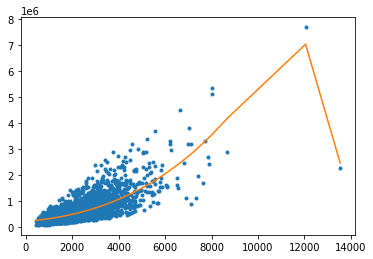

In [34]:
set1_data = polynomial_sframe(set1['sqft_living'], 15)
set1_features = set1_data.column_names() # get the name of the features
set1_data['price'] = set1['price']
set1_model = turicreate.linear_regression.create(set1_data, 
                                             target = 'price',
                                             features = set1_features,
                                             l2_penalty = l2_large_penalty,
                                             validation_set = None,
                                             verbose = False)
set1_model.coefficients.print_rows(num_rows=16)
plt.plot(set1_data['power_1'], set1_data['price'], '.', set1_data['power_1'], set1_model.predict(set1_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    254573.0613592175    |   1254913.9874879296   |
|   power_1   |  None |    49.72364380029556    |   6478.699847854849    |
|   power_2   |  None |   0.022804636066077855  |   13.744963012011532   |
|   power_3   |  None |  4.035622054941485e-06  |  0.015535551360869584  |
|   power_4   |  None |  2.3146895628947213e-10 |   9.830578697517e-06   |
|   power_5   |  None | -1.7444085740364216e-14 | 2.412303956244179e-09  |
|   power_6   |  None |  -4.594695876114584e-18 |          nan           |
|   power_7   |  None |  -5.238782412846056e-22 |          nan           |
|   power_8   |  None |  -4.306525098396648e-26 |          nan           |
|   power_9   |  None | -2.5737707268355443e-30 | 1.7506280051324915e-24 |
|   power_10  |  None |  

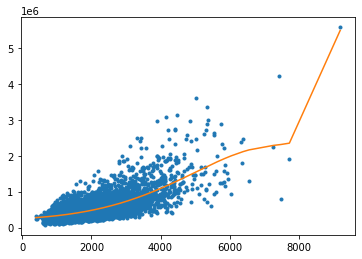

In [35]:
set2_data = polynomial_sframe(set2['sqft_living'], 15)
set2_features = set2_data.column_names() # get the name of the features
set2_data['price'] = set2['price']
set2_model = turicreate.linear_regression.create(set2_data, 
                                             target = 'price',
                                             features = set2_features,
                                             l2_penalty = l2_large_penalty,
                                             validation_set = None,
                                             verbose = False)
set2_model.coefficients.print_rows(num_rows=16)
plt.plot(set2_data['power_1'], set2_data['price'], '.', set2_data['power_1'], set2_model.predict(set2_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    241826.65396070518   |   1155101.1561749496   |
|   power_1   |  None |    58.27505868890193    |   5295.842471038894    |
|   power_2   |  None |   0.02527150979179223   |   9.850539325576351    |
|   power_3   |  None |  3.2362340298055556e-06 |  0.009412310797325997  |
|   power_4   |  None |  8.480025803231817e-11  | 4.134387214652737e-06  |
|   power_5   |  None | -1.1250235262816766e-14 |          nan           |
|   power_6   |  None | -1.6738796160900489e-18 |          nan           |
|   power_7   |  None | -1.4577673588719048e-22 |          nan           |
|   power_8   |  None |  -9.87634910523406e-27  |          nan           |
|   power_9   |  None | -4.8592526043152835e-31 |          nan           |
|   power_10  |  None | -

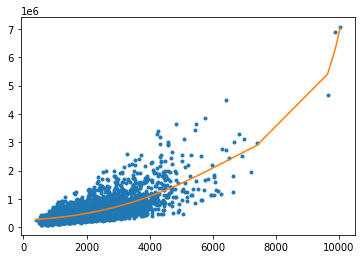

In [36]:
set3_data = polynomial_sframe(set3['sqft_living'], 15)
set3_features = set3_data.column_names() # get the name of the features
set3_data['price'] = set3['price']
set3_model = turicreate.linear_regression.create(set3_data, 
                                             target = 'price',
                                             features = set3_features,
                                             l2_penalty = l2_large_penalty,
                                             validation_set = None,
                                             verbose = False)
set3_model.coefficients.print_rows(num_rows=16)
plt.plot(set3_data['power_1'], set3_data['price'], '.', set3_data['power_1'], set3_model.predict(set3_data), '-')

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    258364.79445265414   |   1535890.6689697227   |
|   power_1   |  None |    48.250267246966565   |   9875.235488504133    |
|   power_2   |  None |   0.021421536200910463  |   26.32156988612657    |
|   power_3   |  None |  4.081343673785995e-06  |  0.03851811645317226   |
|   power_4   |  None |  3.3744050997890454e-10 | 3.4496615720581356e-05 |
|   power_5   |  None | -2.4336676005843282e-15 | 1.978835699865271e-08  |
|   power_6   |  None | -4.2132277869127885e-18 | 7.2534692937646425e-12 |
|   power_7   |  None |  -6.610449092626798e-22 | 1.5261160788887101e-15 |
|   power_8   |  None |  -6.790986328793984e-26 |          nan           |
|   power_9   |  None |  -4.83291549329938e-30  |          nan           |
|   power_10  |  None | -

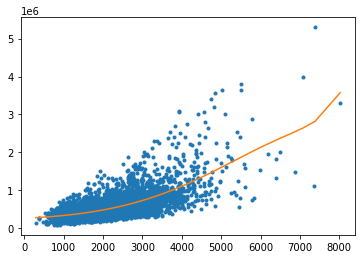

In [37]:
set4_data = polynomial_sframe(set4['sqft_living'], 15)
set4_features = set4_data.column_names() # get the name of the features
set4_data['price'] = set4['price']
set4_model = turicreate.linear_regression.create(set4_data, 
                                             target = 'price',
                                             features = set4_features,
                                             l2_penalty = l2_large_penalty,
                                             validation_set = None,
                                             verbose = False)
set4_model.coefficients.print_rows(num_rows=16)
plt.plot(set4_data['power_1'], set4_data['price'], '.', set4_data['power_1'], set4_model.predict(set4_data), '-')

These curves are varieng a lot less, now that we applied a high degree of regularization.

11. **QUIZ QUESTION:** For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

#**Selecting an L2 penalty via cross-validation**

12. Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:



*   Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

*   Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

*   ...

*   Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set


After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

In [0]:
import pandas as pd

In [0]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [0]:
train_valid_shuffled = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Course 2 Machine Learning Regression/Week4/Assignment/wk3_kc_house_train_valid_shuffled.csv',dtype=dtype_dict)
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Course 2 Machine Learning Regression/Week4/Assignment/wk3_kc_house_test_data.csv', dtype=dtype_dict)

14. Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [51]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


 Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.


In [52]:
train_valid_shuffled[0:10] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,3,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,3,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,5,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,4,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,5,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,3,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,4,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,3,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,4,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,3,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


Meanwhile, to choose the remainder of the data that's not part of the segment i, we select two slices (0:start) and (end+1:n) and paste them together.

In [0]:
# train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
validation4 = train_valid_shuffled[5818: 7758]

# To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $536,234.

In [55]:
print(int(round(validation4['price'].mean(), 0)))

536234


 After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. SFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_valid_shuffled` dataframe.


In [57]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print(first_two.append(last_two))

               id             date  ...  sqft_living15  sqft_lot15
0      2780400035  20140505T000000  ...         2580.0      5900.0
1      1703050500  20150321T000000  ...         2710.0      6629.0
19394  4139480190  20140916T000000  ...         3850.0     11170.0
19395  7237300290  20150326T000000  ...         1880.0      4319.0

[4 rows x 21 columns]


Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [0]:
n = len(train_valid_shuffled)
before_third = train_valid_shuffled[0:5818]
after_third = train_valid_shuffled[7758:n]
train4 = before_third.append(after_third) 


To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $539,450.


In [59]:
print(int(round(train4['price'].mean(), 0)))

539450


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.
 
* For each i in [0, 1, ..., k-1]:
* Compute starting and ending indices of segment i and call 'start' and 'end'
* Form validation set by taking a slice (start:end+1) from the data.
* Form training set by appending slice (end+1:n) to the end of slice (0:start).
* Train a linear model using training set just formed, with a given l2_penalty
* Compute validation error using validation set just formed

In [0]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    errors = []
    for i in range(0, k):
        start = (n*i)/k
        end = (n*(i+1)/k)-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])
        
        model = turicreate.linear_regression.create(training_set,
                                                  target = output_name, features = features_list,
                                                  l2_penalty=l2_penalty,
                                                  validation_set = None,
                                                  verbose = False)
        
        price_validation_predicted = model.predict(validation_set)
        val_errors = price_validation_predicted - validation_set['price']
        RSS = sum(val_errors * val_errors)
        errors.append(RSS)
        
    return sum(errors)/len(errors)

 Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
* Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.
 
Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!


In [64]:
min_error = None
best_l2_penalty = None
cross_val_error = []
l2_penalty_values = np.logspace(1, 7, num=13)

for l2_penalty in l2_penalty_values:
  # print(l2_penalty)
  avg_val_error = k_fold_cross_validation(10, l2_penalty, poly15_data, 'price', poly15_features)
  # print(avg_val_error)
  cross_val_error.append(avg_val_error)
  if min_error is None or avg_val_error < min_error:
    min_error = avg_val_error
    best_l2_penalty = l2_penalty

print("Best error : ", best_l2_penalty)

Best error :  10000000.0


17. **Quiz Question:** What is the best value for the L2 penalty according to 10-fold validation?

18. Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   539339.3469613944    |   621956.2498978289    |
|   power_1   |  None |  0.09858478063667375   |   2856.9952450255037   |
|   power_2   |  None | 5.5488904056071746e-05 |   5.465203012804688    |
|   power_3   |  None | 1.143515316214333e-08  |  0.005745964026966731  |
|   power_4   |  None | 9.689113286115282e-13  | 3.694842803284301e-06  |
|   power_5   |  None |  5.61179522014483e-17  | 1.5270938184002782e-09 |
|   power_6   |  None | 3.1238390942512715e-21 | 4.1399245214871023e-13 |
|   power_7   |  None | 1.8184098313486853e-25 | 7.455784091583188e-17  |
|   power_8   |  None | 1.1102191229272479e-29 | 9.829440485677686e-21  |
|   power_9   |  None | 7.029601422111965e-34  | 1.2561123084301327e-24 |
|   power_10  |  None | 4.569303021975

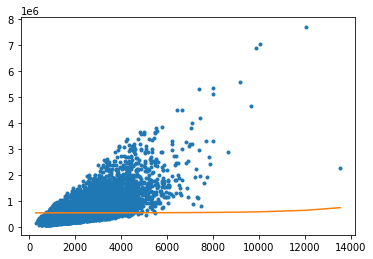

In [67]:
train_data = polynomial_sframe(sales['sqft_living'], 15)
train_features = train_data.column_names() # get the name of the features
train_data['price'] = sales['price']
train_model = turicreate.linear_regression.create(train_data, 
                                             target = 'price',
                                             features = train_features,
                                             l2_penalty = best_l2_penalty,
                                             validation_set = None,
                                             verbose = False)
train_model.coefficients.print_rows(num_rows=16)
plt.plot(train_data['power_1'], train_data['price'], '.', train_data['power_1'], train_model.predict(train_data), '-')

19. **Quiz Question:** Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [69]:
train_model.evaluate

<bound method LinearRegression.evaluate of Class                          : LinearRegression

Schema
------
Number of coefficients         : 16
Number of examples             : 21613
Number of feature columns      : 15
Number of unpacked features    : 15

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 10000000.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.036

Settings
--------
Residual sum of squares        : 2899815356916758.5
Training RMSE                  : 366292.1792

Highest Positive Coefficients
-----------------------------
(intercept)                    : 539339.347
power_1                        : 0.0986
power_2                        : 0.0001
power_3                        : 0.0
power_4                        : 0.0

Lowest Negative Coefficients
-----------

In [71]:
test_data = polynomial_sframe(sales['sqft_living'], 15)
difference = train_model.predict(test_data) - test['price']
error_square = (difference * difference)
RSS = error_square.sum()
print(RSS)

array('d', [1018634147068347.4, 2272215514347.8696, 2664153346016223.0, 469728668299354.4, 1946385821894362.5, 43667689304346.664, 286342892824348.4, 552410448307939.9, 589115393924346.5, 2420716080503047.5, 195492092384347.7, 393455387324351.1, 2426868097664364.0, 1417477748926325.0, 424523844907947.25, 1879820183804410.0, 1944099808694398.0, 192062855325488.44, 1462664403547967.8, 999952895024365.2, 12098130061347.895, 2312375169488365.0, 100270408790345.28, 286342892824348.4, 626071658166542.2, 954006219914344.0, 625336219034341.8, 1519141877133049.0, 2704139630152217.0, 1256295683596304.0, 1095088195244358.8, 1245896020574322.8, 822650094584347.0, 229757564560343.25, 1600125333278336.0, 11066949593228.094, 1882068096784308.2, 967676754197346.2, 4336181477438390.0, 922486534087351.0, 41135750501348.09, 121931691944350.4, 843867375889343.8, 2051541934070395.0, 1946385821894362.5, 1.9297421669504176e+16, 2646331807594428.0, 662637694144353.2, 1057585990944305.0, 2272215514347.8696, 12

In [73]:
test_data = polynomial_sframe(test['sqft_living'], 15)
predictions_test = train_model.predict(test_data)
test_errors = predictions_test - test['price']
RSS_test = (test_errors * test_errors).sum()
print(RSS_test)


array('d', [104457056130162.69, 226074192235.88177, 273233850167274.88, 48195091032943.734, 199613345168075.44, 4478821938197.385, 29352792131763.953, 56677828019756.97, 60404407817253.305, 248264695110216.12, 20035945857568.125, 40369713704316.24, 248895701147917.8, 145364675364844.44, 43524032132694.16, 192855743510749.6, 199449956942200.8, 19684283793627.273, 149999313777868.78, 102541023502743.17, 1232388677318.0552, 237152290638239.0, 10271576387403.734, 29352792131763.953, 64194671787173.39, 97828536934194.19, 64119244385802.19, 155792022631700.4, 277335218256387.88, 128832855659197.5, 112298546639840.88, 127766206345487.78, 84356177228547.1, 23549852367246.43, 164098248384201.16, 1126735657794.1318, 193016408599526.22, 99230643654758.62, 444840422513150.75, 94595752086209.97, 4208614951513.871, 12492699583372.27, 86532289262821.69, 210399011677753.7, 199613345168075.44, 1979580739599386.0, 271488841256711.44, 67944930954351.41, 108452138062185.28, 226074192235.88177, 12977213913